In [3]:
import numpy
import scipy.special
import matplotlib.pyplot
# neural network class definition
class neuralNetwork:
    #initialize the neyral network
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        #set number of nodes in each put, hiden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        #linking weights matrices, wih and who
        #such as
        #w11 w21
        #w12 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        self.lr = learningrate
        #activation function is the sigmoid function
        self.activation_function = lambda x:scipy.special.expit(x)
        pass
    #train the neural network
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        #calculate
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        #updates the weights
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1 - final_outputs)),numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)),numpy.transpose(inputs))
        pass
    #query the neural function
    def query(self,inputs_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        #calculate
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
n = neuralNetwork(784, 100 ,10, 0.3)
data_file = open("mnist_train_1000.csv")
data_list = data_file.readlines()
data_file.close()

#image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
#matplotlib.pyplot.imshow(image_array, cmap='Greys')
for record in data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(10) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass

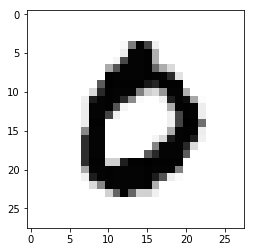

In [4]:
test_file = open("C:/Users/Administrator/Desktop/mnist_test_10.csv")
test_list = test_file.readlines()
test_file.close()
all_values = test_list[3].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys')

In [5]:
n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[0.69243658],
       [0.00746709],
       [0.01853746],
       [0.01016646],
       [0.0010522 ],
       [0.25526562],
       [0.02723531],
       [0.06703543],
       [0.00447709],
       [0.00346809]])

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


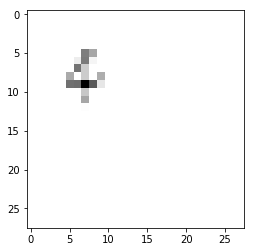

In [8]:
import scipy.misc
import matplotlib.pyplot
img_array = scipy.misc.imread("C:/Users/Administrator/Desktop/4.png",flatten = True)
img_array = img_array.reshape(784)
img_data = 255 - (img_array / 255.0 * 0.99) + 0.01
img_data = img_data.reshape((28,28))
matplotlib.pyplot.imshow(img_data, cmap='Greys')

In [9]:
n.query(img_array)

array([[0.03356095],
       [0.00941533],
       [0.36547377],
       [0.05652511],
       [0.01685363],
       [0.25691347],
       [0.03961172],
       [0.07749768],
       [0.57857989],
       [0.00224803]])